In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import erfinv
import math
import os

from sklearn.metrics import mean_absolute_error as mae

In [2]:
dir_path = "gisst-data/gisst-forecasts-by-version/"
files = os.listdir(dir_path)
files.sort()

In [3]:
gisst_cases_pred = [[0] for i in range(4)]
gisst_deaths_pred = [[0] for i in range(4)]
gisst_hosp_pred = [[0] for i in range(4)]

gisst_cases_pred[0] = pd.DataFrame()
gisst_cases_pred[1] = pd.DataFrame()
gisst_cases_pred[2] = pd.DataFrame()
gisst_cases_pred[3] = pd.DataFrame()

gisst_deaths_pred[0] = pd.DataFrame()
gisst_deaths_pred[1] = pd.DataFrame()
gisst_deaths_pred[2] = pd.DataFrame()
gisst_deaths_pred[3] = pd.DataFrame()

gisst_hosp_pred[0] = pd.DataFrame()
gisst_hosp_pred[1] = pd.DataFrame()
gisst_hosp_pred[2] = pd.DataFrame()
gisst_hosp_pred[3] = pd.DataFrame()

In [4]:
for file in files:
#     print("file name: ", file)
    if (file.endswith(".csv") == False):
        continue;
    df = pd.read_csv(dir_path + file)
    point_forecasts = df[df.type == "point"]
    
    tmp_gisst_cases_pred_1w = point_forecasts[point_forecasts.target == "1 wk ahead inc case"].value
    tmp_gisst_cases_pred_2w = point_forecasts[point_forecasts.target == "2 wk ahead inc case"].value
    tmp_gisst_cases_pred_3w = point_forecasts[point_forecasts.target == "3 wk ahead inc case"].value
    tmp_gisst_cases_pred_4w = point_forecasts[point_forecasts.target == "4 wk ahead inc case"].value

    tmp_gisst_deaths_pred_1w = point_forecasts[point_forecasts.target == "1 wk ahead inc death"].value
    tmp_gisst_deaths_pred_2w = point_forecasts[point_forecasts.target == "2 wk ahead inc death"].value
    tmp_gisst_deaths_pred_3w = point_forecasts[point_forecasts.target == "3 wk ahead inc death"].value
    tmp_gisst_deaths_pred_4w = point_forecasts[point_forecasts.target == "4 wk ahead inc death"].value

    first_week_hosp = ["1 day ahead inc hosp", "2 day ahead inc hosp", "3 day ahead inc hosp", "4 day ahead inc hosp", "5 day ahead inc hosp", "6 day ahead inc hosp", "7 day ahead inc hosp"]
    second_week_hosp = ["8 day ahead inc hosp", "9 day ahead inc hosp", "10 day ahead inc hosp", "11 day ahead inc hosp", "12 day ahead inc hosp", "13 day ahead inc hosp", "14 day ahead inc hosp"]
    third_week_hosp = ["15 day ahead inc hosp", "16 day ahead inc hosp", "17 day ahead inc hosp", "18 day ahead inc hosp", "19 day ahead inc hosp", "20 day ahead inc hosp", "21 day ahead inc hosp"]
    fourth_week_hosp = ["22 day ahead inc hosp", "23 day ahead inc hosp", "24 day ahead inc hosp", "25 day ahead inc hosp", "26 day ahead inc hosp", "27 day ahead inc hosp", "28 day ahead inc hosp"]
    tmp_gisst_hosp_pred_1w = pd.DataFrame(point_forecasts[point_forecasts.target.isin(first_week_hosp)].sum()).transpose().value
    tmp_gisst_hosp_pred_2w = pd.DataFrame(point_forecasts[point_forecasts.target.isin(second_week_hosp)].sum()).transpose().value
    tmp_gisst_hosp_pred_3w = pd.DataFrame(point_forecasts[point_forecasts.target.isin(third_week_hosp)].sum()).transpose().value
    tmp_gisst_hosp_pred_4w = pd.DataFrame(point_forecasts[point_forecasts.target.isin(fourth_week_hosp)].sum()).transpose().value
       
    gisst_cases_pred[0] = pd.concat([gisst_cases_pred[0], tmp_gisst_cases_pred_1w], axis = 0)
    gisst_cases_pred[1] = pd.concat([gisst_cases_pred[1], tmp_gisst_cases_pred_2w], axis = 0)
    gisst_cases_pred[2] = pd.concat([gisst_cases_pred[2], tmp_gisst_cases_pred_3w], axis = 0)
    gisst_cases_pred[3] = pd.concat([gisst_cases_pred[3], tmp_gisst_cases_pred_4w], axis = 0)
    
    gisst_deaths_pred[0] = pd.concat([gisst_deaths_pred[0], tmp_gisst_deaths_pred_1w], axis = 0)
    gisst_deaths_pred[1] = pd.concat([gisst_deaths_pred[1], tmp_gisst_deaths_pred_2w], axis = 0)
    gisst_deaths_pred[2] = pd.concat([gisst_deaths_pred[2], tmp_gisst_deaths_pred_3w], axis = 0)
    gisst_deaths_pred[3] = pd.concat([gisst_deaths_pred[3], tmp_gisst_deaths_pred_4w], axis = 0)
        
    gisst_hosp_pred[0] = pd.concat([gisst_hosp_pred[0], tmp_gisst_hosp_pred_1w], axis = 0)
    gisst_hosp_pred[1] = pd.concat([gisst_hosp_pred[1], tmp_gisst_hosp_pred_2w], axis = 0)
    gisst_hosp_pred[2] = pd.concat([gisst_hosp_pred[2], tmp_gisst_hosp_pred_3w], axis = 0)
    gisst_hosp_pred[3] = pd.concat([gisst_hosp_pred[3], tmp_gisst_hosp_pred_4w], axis = 0)

In [5]:
    gisst_cases_pred[0] = gisst_cases_pred[0][3:]
    gisst_cases_pred[1] = gisst_cases_pred[1][2:-1]
    gisst_cases_pred[2] = gisst_cases_pred[2][1:-2]
    gisst_cases_pred[3] = gisst_cases_pred[3][:-3]
    
    gisst_deaths_pred[0] = gisst_deaths_pred[0][3:]
    gisst_deaths_pred[1] = gisst_deaths_pred[1][2:-1]
    gisst_deaths_pred[2] = gisst_deaths_pred[2][1:-2]
    gisst_deaths_pred[3] = gisst_deaths_pred[3][:-3]
        
    gisst_hosp_pred[0] = gisst_hosp_pred[0][3:]
    gisst_hosp_pred[1] = gisst_hosp_pred[1][2:-1]
    gisst_hosp_pred[2] = gisst_hosp_pred[2][1:-2]
    gisst_hosp_pred[3] = gisst_hosp_pred[3][:-3]

In [6]:
data_ref = sio.loadmat("data/data_weekly_avg.mat")

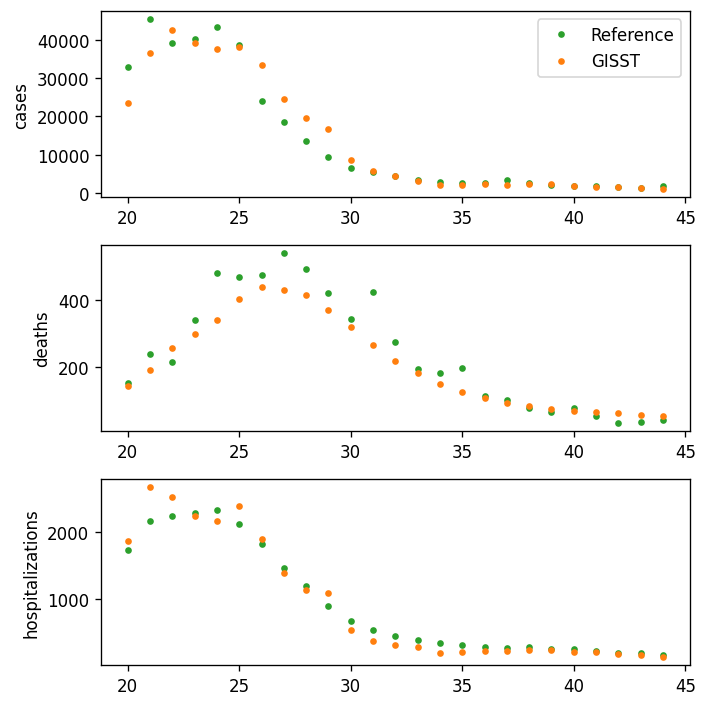

In [7]:
fig = plt.figure(figsize=(6, 6), dpi=120)
plt.subplot(3, 1, 1)
plt.plot(np.arange(20, 45), data_ref["cases"].T[40:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_cases_pred[0] / 7, '.', color='tab:orange', label="GISST")
plt.ylabel("cases")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(np.arange(20, 45), data_ref["deaths"].T[40:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_deaths_pred[0] / 7, '.', color='tab:orange', label="GISST")
plt.ylabel("deaths")

plt.subplot(3, 1, 3)
plt.plot(np.arange(20, 45), data_ref["hospitalized"].T[40:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_hosp_pred[0] / 7, '.', color='tab:orange', label="GISST")
plt.ylabel("hospitalizations")

plt.tight_layout()

Text(0.02, 0.5, 'predictions for the following weeks')

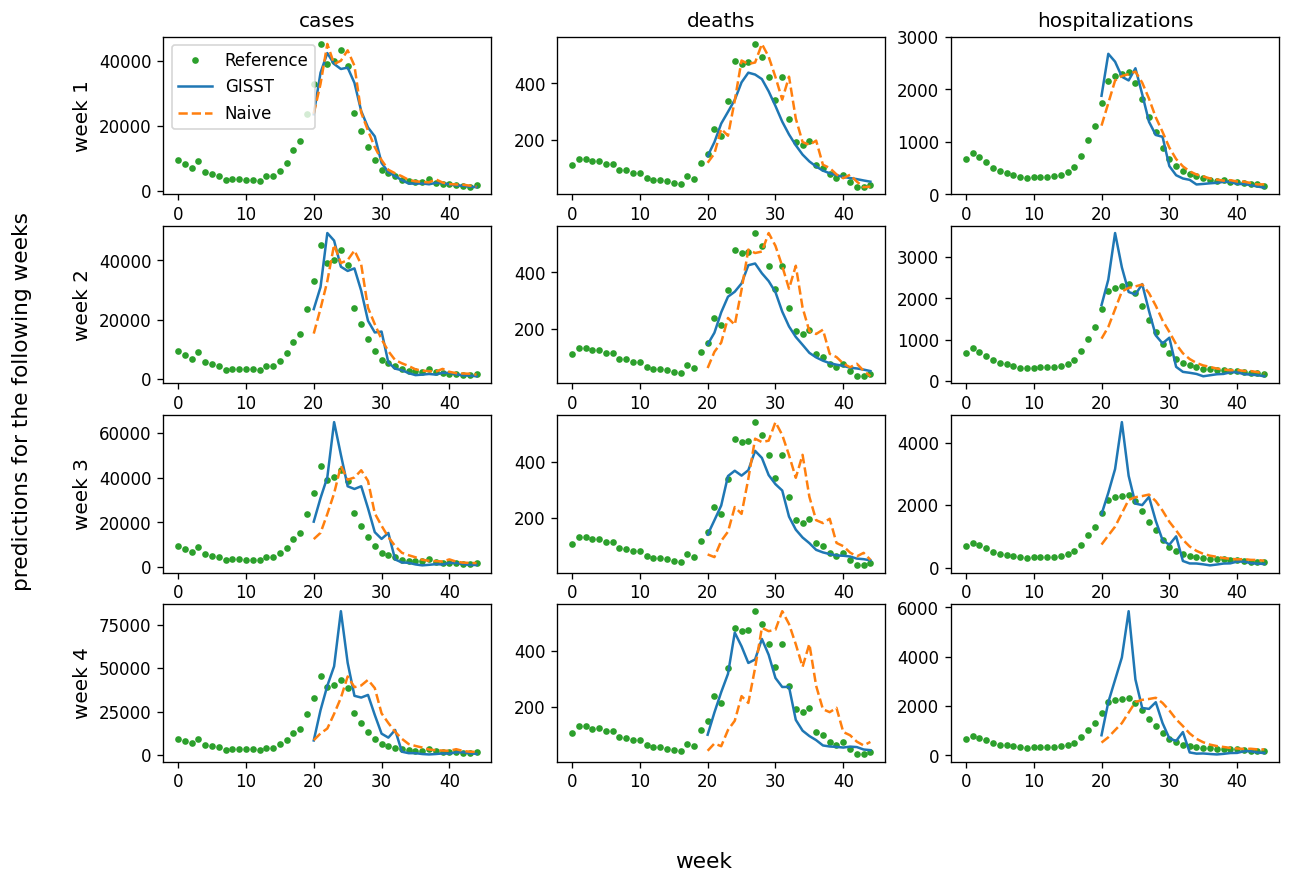

In [8]:
fig = plt.figure(figsize=(12, 8), dpi=120)
plt.subplot(4, 3, 1)
plt.plot(np.arange(0, 45), data_ref["cases"].T[20:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_cases_pred[0] / 7, color='tab:blue', label="GISST")
plt.plot(np.arange(20, 45), data_ref["cases"].T[40-1:65-1], '--', color="tab:orange", label="Naive")
plt.ylabel("week 1", fontsize=12)
plt.title("cases", fontsize=12)
plt.legend()

plt.subplot(4, 3, 2)
plt.plot(np.arange(0, 45), data_ref["deaths"].T[20:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_deaths_pred[0] / 7, color="tab:blue")
plt.plot(np.arange(20, 45), data_ref["deaths"].T[40-1:65-1], '--', color="tab:orange", label="Naive")
plt.title("deaths", fontsize=12)

plt.subplot(4, 3, 3)
plt.plot(np.arange(0, 45), data_ref["hospitalized"].T[20:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_hosp_pred[0] / 7, color='tab:blue')
plt.plot(np.arange(20, 45), data_ref["hospitalized"].T[40-1:65-1], '--', color="tab:orange", label="Naive")
plt.ylim((0, 3000))
plt.title("hospitalizations", fontsize=12)

plt.subplot(4, 3, 4)
plt.plot(np.arange(0, 45), data_ref["cases"].T[20:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_cases_pred[1] / 7, color='tab:blue')
plt.plot(np.arange(20, 45), data_ref["cases"].T[40-2:65-2], '--', color="tab:orange", label="Naive")
plt.ylabel("week 2", fontsize=12)

plt.subplot(4, 3, 5)
plt.plot(np.arange(0, 45), data_ref["deaths"].T[20:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_deaths_pred[1] / 7, color='tab:blue')
plt.plot(np.arange(20, 45), data_ref["deaths"].T[40-2:65-2], '--', color="tab:orange", label="Naive")

plt.subplot(4, 3, 6)
plt.plot(np.arange(0, 45), data_ref["hospitalized"].T[20:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_hosp_pred[1] / 7, color='tab:blue')
plt.plot(np.arange(20, 45), data_ref["hospitalized"].T[40-2:65-2], '--', color="tab:orange", label="Naive")

plt.subplot(4, 3, 7)
plt.plot(np.arange(0, 45), data_ref["cases"].T[20:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_cases_pred[2] / 7, color='tab:blue')
plt.plot(np.arange(20, 45), data_ref["cases"].T[40-3:65-3], '--', color="tab:orange", label="Naive")
plt.ylabel("week 3", fontsize=12)

plt.subplot(4, 3, 8)
plt.plot(np.arange(0, 45), data_ref["deaths"].T[20:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_deaths_pred[2] / 7, color='tab:blue')
plt.plot(np.arange(20, 45), data_ref["deaths"].T[40-3:65-3], '--', color="tab:orange", label="Naive")

plt.subplot(4, 3, 9)
plt.plot(np.arange(0, 45), data_ref["hospitalized"].T[20:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_hosp_pred[2] / 7, color='tab:blue')
plt.plot(np.arange(20, 45), data_ref["hospitalized"].T[40-3:65-3], '--', color="tab:orange", label="Naive")

plt.subplot(4, 3, 10)
plt.plot(np.arange(0, 45), data_ref["cases"].T[20:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_cases_pred[3] / 7, color='tab:blue')
plt.plot(np.arange(20, 45), data_ref["cases"].T[40-4:65-4], '--', color="tab:orange", label="Naive")
plt.ylabel("week 4", fontsize=12)

plt.subplot(4, 3, 11)
plt.plot(np.arange(0, 45), data_ref["deaths"].T[20:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_deaths_pred[3] / 7, color='tab:blue')
plt.plot(np.arange(20, 45), data_ref["deaths"].T[40-4:65-4], '--', color="tab:orange", label="Naive")

plt.subplot(4, 3, 12)
plt.plot(np.arange(0, 45), data_ref["hospitalized"].T[20:65], '.', color="tab:green", label="Reference")
plt.plot(np.arange(20, 45), gisst_hosp_pred[3] / 7, color='tab:blue')
plt.plot(np.arange(20, 45), data_ref["hospitalized"].T[40-4:65-4], '--', color="tab:orange", label="Naive")

fig.supxlabel("week", fontsize=13)
fig.supylabel("predictions for the following weeks", fontsize=13)

In [9]:
mae_cases_1w = mae(data_ref["cases"].T[40:65], gisst_cases_pred[0] / 7)
mae_cases_naive = mae(data_ref["cases"].T[40:65], data_ref["cases"].T[40-1:65-1])
print("mase_cases_1w: ", mae_cases_1w / mae_cases_naive)

mae_cases_2w = mae(data_ref["cases"].T[40:65], gisst_cases_pred[1] / 7)
mae_cases_naive = mae(data_ref["cases"].T[40:65], data_ref["cases"].T[40-2:65-2])
print("mase_cases_2w: ", mae_cases_2w / mae_cases_naive)

mae_cases_3w = mae(data_ref["cases"].T[40:65], gisst_cases_pred[2] / 7)
mae_cases_naive = mae(data_ref["cases"].T[40:65], data_ref["cases"].T[40-3:65-3])
print("mase_cases_3w: ", mae_cases_3w / mae_cases_naive)

mae_cases_4w = mae(data_ref["cases"].T[40:65], gisst_cases_pred[3] / 7)
mae_cases_naive = mae(data_ref["cases"].T[40:65], data_ref["cases"].T[40-4:65-4])
print("mase_cases_4w: ", mae_cases_4w / mae_cases_naive)

mae_deaths_1w = mae(data_ref["deaths"].T[40:65], gisst_deaths_pred[0] / 7)
mae_deaths_naive = mae(data_ref["deaths"].T[40:65], data_ref["deaths"].T[40-1:65-1])
print("mase_deaths_1w: ", mae_deaths_1w / mae_deaths_naive)

mae_deaths_2w = mae(data_ref["deaths"].T[40:65], gisst_deaths_pred[1] / 7)
mae_deaths_naive = mae(data_ref["deaths"].T[40:65], data_ref["deaths"].T[40-2:65-2])
print("mase_deaths_2w: ", mae_deaths_2w / mae_deaths_naive)

mae_deaths_3w = mae(data_ref["deaths"].T[40:65], gisst_deaths_pred[2] / 7)
mae_deaths_naive = mae(data_ref["deaths"].T[40:65], data_ref["deaths"].T[40-3:65-3])
print("mase_deaths_3w: ", mae_deaths_3w / mae_deaths_naive)

mae_deaths_4w = mae(data_ref["deaths"].T[40:65], gisst_deaths_pred[3] / 7)
mae_deaths_naive = mae(data_ref["deaths"].T[40:65], data_ref["deaths"].T[40-4:65-4])
print("mase_deaths_4w: ", mae_deaths_4w / mae_deaths_naive)

mae_hosp_1w = mae(data_ref["hospitalized"].T[40:65], gisst_hosp_pred[0] / 7)
mae_hosp_naive = mae(data_ref["hospitalized"].T[40:65], data_ref["hospitalized"].T[40-1:65-1])
print("mase_hosp_1w: ", mae_hosp_1w / mae_hosp_naive)

mae_hosp_2w = mae(data_ref["hospitalized"].T[40:65], gisst_hosp_pred[1] / 7)
mae_hosp_naive = mae(data_ref["hospitalized"].T[40:65], data_ref["hospitalized"].T[40-2:65-2])
print("mase_hosp_2w: ", mae_hosp_2w / mae_hosp_naive)

mae_hosp_3w = mae(data_ref["hospitalized"].T[40:65], gisst_hosp_pred[2] / 7)
mae_hosp_naive = mae(data_ref["hospitalized"].T[40:65], data_ref["hospitalized"].T[40-3:65-3])
print("mase_hosp_3w: ", mae_hosp_3w / mae_hosp_naive)

mae_hosp_4w = mae(data_ref["hospitalized"].T[40:65], gisst_hosp_pred[3] / 7)
mae_hosp_naive = mae(data_ref["hospitalized"].T[40:65], data_ref["hospitalized"].T[40-4:65-4])
print("mase_hosp_4w: ", mae_hosp_4w / mae_hosp_naive)

mase_cases_1w:  0.8474491411568289
mase_cases_2w:  0.7537033540341567
mase_cases_3w:  0.7103841943425779
mase_cases_4w:  0.7593036477565416
mase_deaths_1w:  0.8846579313543598
mase_deaths_2w:  0.6385438300483165
mase_deaths_3w:  0.45434873251514
mase_deaths_4w:  0.33689610389610386
mase_hosp_1w:  0.9142458123559654
mase_hosp_2w:  0.7821064134102538
mase_hosp_3w:  0.7681439388177634
mase_hosp_4w:  0.8929117023267419


In [10]:
# dic = {"week": np.arange(20, 45),
#        "cases_pred_1w": np.array(gisst_cases_pred[0] / 7).reshape(-1),
#        "cases_pred_2w": np.array(gisst_cases_pred[1] / 7).reshape(-1), 
#        "cases_pred_3w": np.array(gisst_cases_pred[2] / 7).reshape(-1), 
#        "cases_pred_4w": np.array(gisst_cases_pred[3] / 7).reshape(-1), 
#        "deaths_pred_1w": np.array(gisst_deaths_pred[0] / 7).reshape(-1), 
#        "deaths_pred_2w": np.array(gisst_deaths_pred[1] / 7).reshape(-1), 
#        "deaths_pred_3w": np.array(gisst_deaths_pred[2] / 7).reshape(-1), 
#        "deaths_pred_4w": np.array(gisst_deaths_pred[3] / 7).reshape(-1), 
#        "hospitalized_pred_1w": np.array(gisst_hosp_pred[0] / 7).reshape(-1), 
#        "hospitalized_pred_2w": np.array(gisst_hosp_pred[1] / 7).reshape(-1), 
#        "hospitalized_pred_3w": np.array(gisst_hosp_pred[2] / 7).reshape(-1), 
#        "hospitalized_pred_4w": np.array(gisst_hosp_pred[3] / 7).reshape(-1)}

In [11]:
# sio.savemat("result/gisst_point_forecasts.mat", dic)

In [12]:
# dic

### Get quantile forecasts

In [13]:
dir_path = "gisst-data/gisst-forecasts-by-version/"
files = os.listdir(dir_path)
files.sort()

In [14]:
gisst_cases_pred_quantile = [{} for i in range(4)]
gisst_deaths_pred_quantile = [{} for i in range(4)]
gisst_hosp_pred_quantile = [{} for i in range(4)]

In [15]:
q_list = [0.010, 0.025, 0.050, 0.100, 0.150, 0.200, 0.250, 0.300, 0.350, 0.400,
          0.450, 0.500, 0.550, 0.600, 0.650, 0.700, 0.750, 0.800, 0.850, 0.900, 0.950, 0.975, 0.990]

In [16]:
for q in q_list:
    gisst_cases_pred = [[0] for i in range(4)]
    gisst_deaths_pred = [[0] for i in range(4)]
    gisst_hosp_pred = [[0] for i in range(4)]

    gisst_cases_pred[0] = pd.DataFrame()
    gisst_cases_pred[1] = pd.DataFrame()
    gisst_cases_pred[2] = pd.DataFrame()
    gisst_cases_pred[3] = pd.DataFrame()

    gisst_deaths_pred[0] = pd.DataFrame()
    gisst_deaths_pred[1] = pd.DataFrame()
    gisst_deaths_pred[2] = pd.DataFrame()
    gisst_deaths_pred[3] = pd.DataFrame()

    gisst_hosp_pred[0] = pd.DataFrame()
    gisst_hosp_pred[1] = pd.DataFrame()
    gisst_hosp_pred[2] = pd.DataFrame()
    gisst_hosp_pred[3] = pd.DataFrame()

    for file in files:
    #     print("file name: ", file)
        if (file.endswith(".csv") == False):
            continue;
        df = pd.read_csv(dir_path + file)
        quantile_forecasts = df[(df['type'] == "quantile") & (df['quantile'] == q)]    


        tmp_gisst_cases_pred_1w = quantile_forecasts[quantile_forecasts.target == "1 wk ahead inc case"].value
        tmp_gisst_cases_pred_2w = quantile_forecasts[quantile_forecasts.target == "2 wk ahead inc case"].value
        tmp_gisst_cases_pred_3w = quantile_forecasts[quantile_forecasts.target == "3 wk ahead inc case"].value
        tmp_gisst_cases_pred_4w = quantile_forecasts[quantile_forecasts.target == "4 wk ahead inc case"].value

        tmp_gisst_deaths_pred_1w = quantile_forecasts[quantile_forecasts.target == "1 wk ahead inc death"].value
        tmp_gisst_deaths_pred_2w = quantile_forecasts[quantile_forecasts.target == "2 wk ahead inc death"].value
        tmp_gisst_deaths_pred_3w = quantile_forecasts[quantile_forecasts.target == "3 wk ahead inc death"].value
        tmp_gisst_deaths_pred_4w = quantile_forecasts[quantile_forecasts.target == "4 wk ahead inc death"].value

        first_week_hosp = ["1 day ahead inc hosp", "2 day ahead inc hosp", "3 day ahead inc hosp", "4 day ahead inc hosp", "5 day ahead inc hosp", "6 day ahead inc hosp", "7 day ahead inc hosp"]
        second_week_hosp = ["8 day ahead inc hosp", "9 day ahead inc hosp", "10 day ahead inc hosp", "11 day ahead inc hosp", "12 day ahead inc hosp", "13 day ahead inc hosp", "14 day ahead inc hosp"]
        third_week_hosp = ["15 day ahead inc hosp", "16 day ahead inc hosp", "17 day ahead inc hosp", "18 day ahead inc hosp", "19 day ahead inc hosp", "20 day ahead inc hosp", "21 day ahead inc hosp"]
        fourth_week_hosp = ["22 day ahead inc hosp", "23 day ahead inc hosp", "24 day ahead inc hosp", "25 day ahead inc hosp", "26 day ahead inc hosp", "27 day ahead inc hosp", "28 day ahead inc hosp"]
        tmp_gisst_hosp_pred_1w = pd.DataFrame(quantile_forecasts[quantile_forecasts.target.isin(first_week_hosp)].sum()).transpose().value
        tmp_gisst_hosp_pred_2w = pd.DataFrame(quantile_forecasts[quantile_forecasts.target.isin(second_week_hosp)].sum()).transpose().value
        tmp_gisst_hosp_pred_3w = pd.DataFrame(quantile_forecasts[quantile_forecasts.target.isin(third_week_hosp)].sum()).transpose().value
        tmp_gisst_hosp_pred_4w = pd.DataFrame(quantile_forecasts[quantile_forecasts.target.isin(fourth_week_hosp)].sum()).transpose().value

        gisst_cases_pred[0] = pd.concat([gisst_cases_pred[0], tmp_gisst_cases_pred_1w], axis = 0)
        gisst_cases_pred[1] = pd.concat([gisst_cases_pred[1], tmp_gisst_cases_pred_2w], axis = 0)
        gisst_cases_pred[2] = pd.concat([gisst_cases_pred[2], tmp_gisst_cases_pred_3w], axis = 0)
        gisst_cases_pred[3] = pd.concat([gisst_cases_pred[3], tmp_gisst_cases_pred_4w], axis = 0)

        gisst_deaths_pred[0] = pd.concat([gisst_deaths_pred[0], tmp_gisst_deaths_pred_1w], axis = 0)
        gisst_deaths_pred[1] = pd.concat([gisst_deaths_pred[1], tmp_gisst_deaths_pred_2w], axis = 0)
        gisst_deaths_pred[2] = pd.concat([gisst_deaths_pred[2], tmp_gisst_deaths_pred_3w], axis = 0)
        gisst_deaths_pred[3] = pd.concat([gisst_deaths_pred[3], tmp_gisst_deaths_pred_4w], axis = 0)

        gisst_hosp_pred[0] = pd.concat([gisst_hosp_pred[0], tmp_gisst_hosp_pred_1w], axis = 0)
        gisst_hosp_pred[1] = pd.concat([gisst_hosp_pred[1], tmp_gisst_hosp_pred_2w], axis = 0)
        gisst_hosp_pred[2] = pd.concat([gisst_hosp_pred[2], tmp_gisst_hosp_pred_3w], axis = 0)
        gisst_hosp_pred[3] = pd.concat([gisst_hosp_pred[3], tmp_gisst_hosp_pred_4w], axis = 0)
    
    
    gisst_cases_pred[0] = gisst_cases_pred[0][3:] / 7
    gisst_cases_pred[1] = gisst_cases_pred[1][2:-1] / 7
    gisst_cases_pred[2] = gisst_cases_pred[2][1:-2] / 7
    gisst_cases_pred[3] = gisst_cases_pred[3][:-3] / 7
    
    gisst_deaths_pred[0] = gisst_deaths_pred[0][3:] / 7
    gisst_deaths_pred[1] = gisst_deaths_pred[1][2:-1] / 7
    gisst_deaths_pred[2] = gisst_deaths_pred[2][1:-2] / 7
    gisst_deaths_pred[3] = gisst_deaths_pred[3][:-3] / 7
        
    gisst_hosp_pred[0] = gisst_hosp_pred[0][3:] / 7
    gisst_hosp_pred[1] = gisst_hosp_pred[1][2:-1] / 7
    gisst_hosp_pred[2] = gisst_hosp_pred[2][1:-2] / 7
    gisst_hosp_pred[3] = gisst_hosp_pred[3][:-3] / 7
    
    
    for i in range(4):
        gisst_cases_pred_quantile[i][q] = gisst_cases_pred[i].to_numpy().reshape(-1)
        gisst_deaths_pred_quantile[i][q] = gisst_deaths_pred[i].to_numpy().reshape(-1)
        gisst_hosp_pred_quantile[i][q] = gisst_hosp_pred[i].to_numpy().reshape(-1)

In [17]:
import scoring as scoring 

In [18]:
alpha_list = [0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alpha_list2 = [0.05, 0.2, 0.5]

In [19]:
wis_cases_1w = scoring.weighted_interval_score(data_ref["cases"][:, 40:65],alphas=alpha_list2,
                                            weights=None,q_dict=gisst_cases_pred_quantile[0])[0]
wis_deaths_1w = scoring.weighted_interval_score(data_ref["deaths"][:, 40:65],alphas=alpha_list,
                                             weights=None,q_dict=gisst_deaths_pred_quantile[0])[0]
wis_hospitalized_1w = scoring.weighted_interval_score(data_ref["hospitalized"][:, 40:65],alphas=alpha_list,
                                                   weights=None,q_dict=gisst_hosp_pred_quantile[0])[0]

wis_cases_2w = scoring.weighted_interval_score(data_ref["cases"][:, 40:65],alphas=alpha_list2,
                                            weights=None,q_dict=gisst_cases_pred_quantile[1])[0]
wis_deaths_2w = scoring.weighted_interval_score(data_ref["deaths"][:, 40:65],alphas=alpha_list,
                                             weights=None,q_dict=gisst_deaths_pred_quantile[1])[0]
wis_hospitalized_2w = scoring.weighted_interval_score(data_ref["hospitalized"][:, 40:65],alphas=alpha_list,
                                                   weights=None,q_dict=gisst_hosp_pred_quantile[1])[0]

wis_cases_3w = scoring.weighted_interval_score(data_ref["cases"][:, 40:65],alphas=alpha_list2,
                                            weights=None,q_dict=gisst_cases_pred_quantile[2])[0]
wis_deaths_3w = scoring.weighted_interval_score(data_ref["deaths"][:, 40:65],alphas=alpha_list,
                                             weights=None,q_dict=gisst_deaths_pred_quantile[2])[0]
wis_hospitalized_3w = scoring.weighted_interval_score(data_ref["hospitalized"][:, 40:65],alphas=alpha_list,
                                                   weights=None,q_dict=gisst_hosp_pred_quantile[2])[0]

wis_cases_4w = scoring.weighted_interval_score(data_ref["cases"][:, 40:65],alphas=alpha_list2,
                                            weights=None,q_dict=gisst_cases_pred_quantile[3])[0]
wis_deaths_4w = scoring.weighted_interval_score(data_ref["deaths"][:, 40:65],alphas=alpha_list,
                                             weights=None,q_dict=gisst_deaths_pred_quantile[3])[0]
wis_hospitalized_4w = scoring.weighted_interval_score(data_ref["hospitalized"][:, 40:65],alphas=alpha_list,
                                                   weights=None,q_dict=gisst_hosp_pred_quantile[3])[0]

In [20]:
wis_cases_list = [np.mean(wis_cases_1w), np.mean(wis_cases_2w), np.mean(wis_cases_3w), np.mean(wis_cases_4w)]
wis_deaths_list = [np.mean(wis_deaths_1w), np.mean(wis_deaths_2w), np.mean(wis_deaths_3w), np.mean(wis_deaths_4w)]
wis_hospitalized_list = [np.mean(wis_hospitalized_1w), np.mean(wis_hospitalized_2w), np.mean(wis_hospitalized_3w), np.mean(wis_hospitalized_4w)]

In [21]:
wis_cases_list

[15346.256571428568, 26233.23196190477, 37041.99234285715, 58148.16194285714]

In [22]:
wis_deaths_list

[163.40013511722412, 185.09326790872143, 187.07393105345417, 181.4983461831822]

In [23]:
wis_hospitalized_list

[401.4328634193186, 798.2348277099095, 1300.2514884678335, 2158.947180471397]